### Task 2 : Generalization the basic Galton board algorithm
This notebook Generalization the basic Galton board algorithm.
I apply R² regression on the Hamming weight histogram of the measurement results to evaluate how Gaussian-like the distribution is.Where i create a function to check whether it is gaussian or not. we first made sample of layer 1 ad layer to add i generalized it since cswap has 3 so we will use it for layer =< 3 . we used basic 3 gate hadamard (h) gate for super position or simply flipping coin and controlled not (cx) and controlled swap gate for entangle and interfrence i.e for the routing the ball or for the insuiring ball position and its route.
Additionally, I experimented with RX gates as biased coin operators, offering an alternative to Hadamard for controlling the walk's symmetry.
The goal is to observe how the quantum walk evolves across layers and whether the resulting Hamming weight distribution approximates a Gaussian curve, which is validated using the regression R² score.

In [5]:
%matplotlib inline

In [24]:
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

def check_gaussian(hamming_bin, total_qubit, shots):
    full = {i: hamming_bin.get(i, 0) for i in range(total_qubit + 1)}
    x = np.array(list(full.keys()))
    y = np.array(list(full.values()))
    log_y = np.log(y + 1e-8)

    # Fit a quadratic curve to log(freq) ~ hamming_weight
    coeffs = np.polyfit(x, log_y, 2)
    fit_y = np.polyval(coeffs, x)

    # Compute R² manually
    residuals = log_y - fit_y
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((log_y - np.mean(log_y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.bar(x, y)
    plt.xlabel("hamming_weight")
    plt.ylabel("frequency")
    plt.title("measured one")

    plt.subplot(1, 2, 2)
    plt.plot(x, log_y, 'o-', label='log(frequency)')
    plt.plot(x, fit_y, '--', label=f'Fit,R^2={r_squared:4f}')
    plt.xlabel("hamming_weight")
    plt.ylabel("log(frequency)")
    plt.title("cheacking one")
    plt.legend()
    
    print(f"\n regression R^2 value :{r_squared:4f}")
    if r_squared > 0.95:
        print("perfect")
    elif r_squared > 0.85:
        print("good")
    elif r_squared > 0.7:
        print("satisfactory")
    else:
        print("nope")

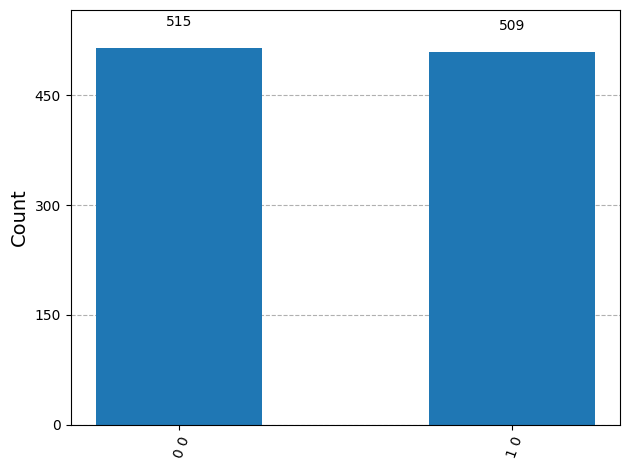

In [26]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
#for layer 1 
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure_all()
backend = AerSimulator()
qc = transpile(qc, backend)
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)
plt.show()

Counter({1: 513, 0: 267, 2: 244})


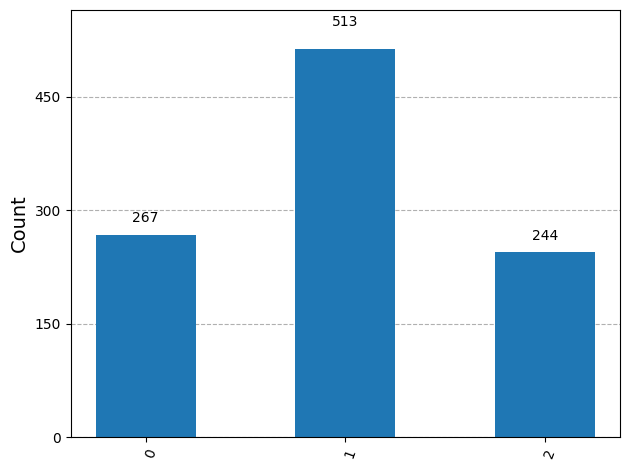

In [25]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
#for layer 2
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.h(1)
qc.measure_all()
backend = AerSimulator()
qc = transpile(qc, backend)
job = backend.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
hamming_bins = Counter()
for bitstring, freq in counts.items():
    hamming_weight = bitstring.count('1')
    hamming_bins[hamming_weight] += freq
print(hamming_bins)
plot_histogram(hamming_bins)
plt.show()


Counter({4: 2701, 3: 2179, 5: 2105, 2: 1080, 6: 1077, 7: 302, 1: 287, 8: 49, 0: 44})


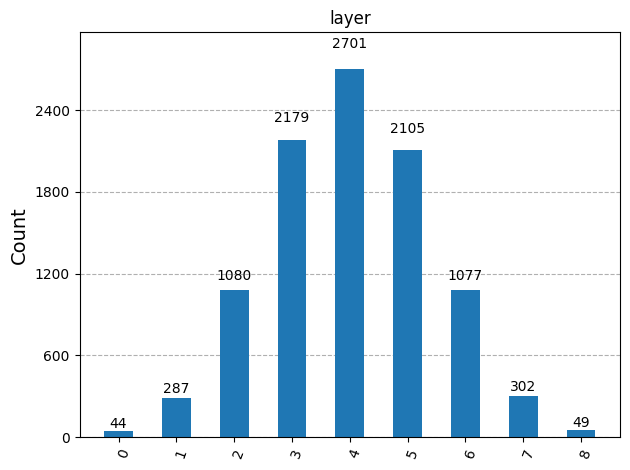


 regression R^2 value :0.999208
perfect


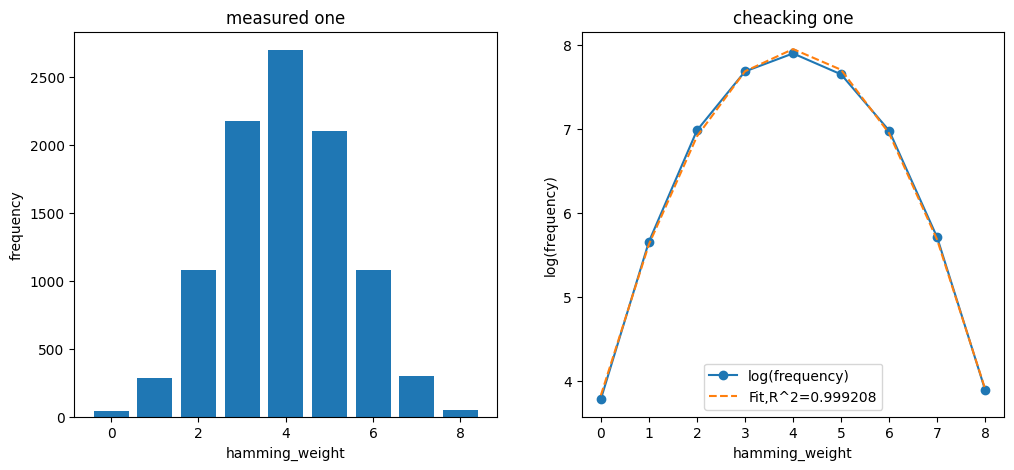

In [31]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
def galton(n_layer):
    n_qubit= n_layer+1
    
    qc=QuantumCircuit(n_qubit,n_layer)
    for i in range(n_layer):
        qc.h(i)
        qc.cx(i,i+1)
    if n_layer >= 3:
        for i in range(n_layer-2):
            qc.cswap(i,i+1,i+2)
    for i in range(n_layer):
        qc.measure(i,i)
    return qc 
simulator =AerSimulator() 
layer_conf = [8]
title = ["layer"] 
for layer, title in zip(layer_conf, title):
    qc = galton(layer)
    compile_cir = transpile(qc,simulator) 
    result = simulator.run(compile_cir,shots=9824).result()
    count = result.get_counts()
from collections import Counter

hamming_bins = Counter()
for bitstring, freq in count.items():
    hamming_weight = bitstring.count('1')
    hamming_bins[hamming_weight] += freq

print(hamming_bins)

plot_histogram(hamming_bins,title=title)
plt.show()
check_gaussian(hamming_bins,total_qubit=8,shots=9824)

Counter({3: 3074, 2: 3010, 1: 1585, 4: 1540, 5: 311, 0: 304})


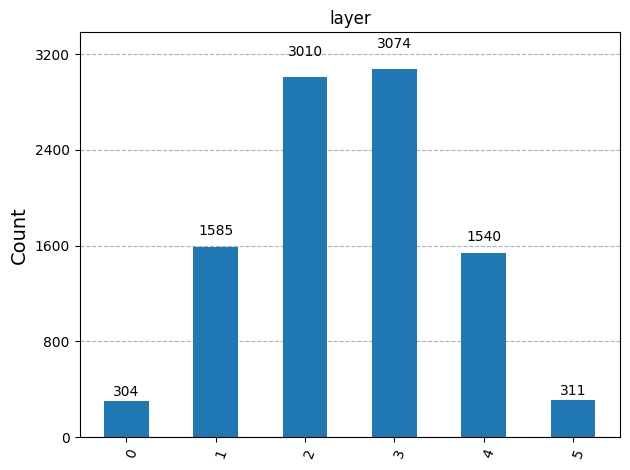


 regression R^2 value :0.997640
perfect


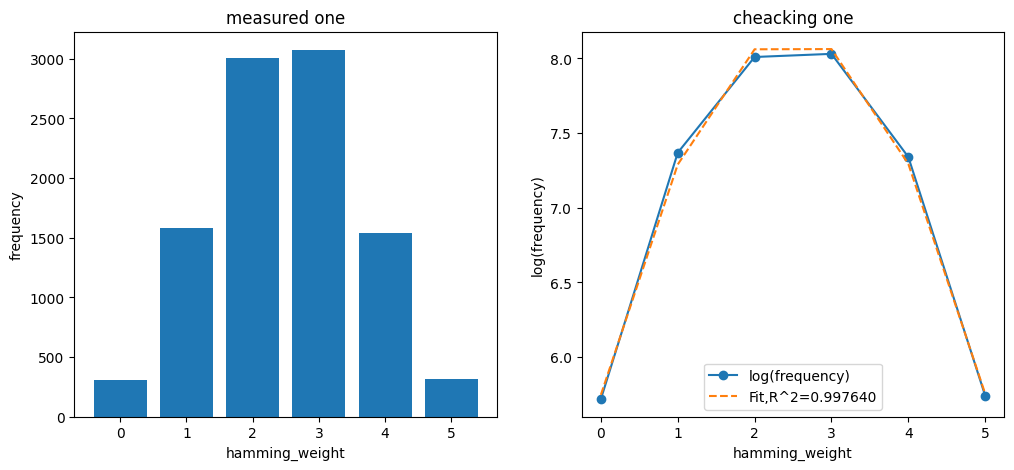

In [27]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from math import pi
def galton(n_layer):
    n_qubit= n_layer+1
    
    qc=QuantumCircuit(n_qubit,n_layer)
    for i in range(n_layer):
        qc.rx(pi/2,i)
        qc.cx(i,i+1)
    if n_layer >= 3:
        for i in range(n_layer-2):
            qc.cswap(i,i+1,i+2)
    for i in range(n_layer):
        qc.measure(i,i)
    return qc 
simulator =AerSimulator() 
layer_conf = [5]
title = ["layer"] 
for layer, title in zip(layer_conf, title):
    qc = galton(layer)
    compile_cir = transpile(qc,simulator) 
    result = simulator.run(compile_cir,shots=9824).result()
    count = result.get_counts()
from collections import Counter

hamming_bins = Counter()
for bitstring, freq in count.items():
    hamming_weight = bitstring.count('1')
    hamming_bins[hamming_weight] += freq

print(hamming_bins)

plot_histogram(hamming_bins,title=title)
plt.show()
check_gaussian(hamming_bins,total_qubit=5,shots=9824)

#  Conclusion
I extended the quantum Galton board simulation across multiple layers and analyzed the output distributions using Hamming weight histograms. For each configuration, I applied a custom check_gaussian() function to compute the R² regression score, which quantifies how closely the distribution matches a Gaussian curve.

In deeper circuits (e.g., 5 layers), the distribution exhibited a near-perfect Gaussian shape, with an R² score of 0.998757, confirming that the quantum walk tends toward a quantum analog of the classical Gaussian distribution.
This behavior emerges due to:

- Superposition and entanglement across layers,

- Interference patterns introduced by CSWAP gates,

- And the probabilistic nature of quantum measurement.

These results validate that the quantum Galton board not only mimics the classical binomial-to-Gaussian transition but also introduces richer dynamics through quantum interference.